# Label Propagation digits: Demonstrating performance#

This example demonstrates the power of semisupervised learning by training a Label Spreading model to classify handwritten digits with sets of very few labels.

The handwritten digit dataset has 1797 total points. The model will be trained using all points, but only 30 will be labeled. Results in the form of a confusion matrix and a series of metrics over each class will be very good.

At the end, the top 10 most uncertain predictions will be shown.

Label propagation is a semi-supervised learning algorithm designed to assign labels to previously unlabeled data points by leveraging the structure of a dataset represented as a graph. This algorithm was introduced by Xiaojin Zhu and Zoubin Ghahramani in 2002 and is particularly useful in scenarios where only a small subset of the data is labeled.

## How Label Propagation Works

The core idea behind label propagation is based on the assumption that similar data points (or nodes in a graph) are likely to share the same label. The algorithm follows these steps:

1. **Graph Construction**: A graph is created where each node represents a data point, and edges connect nodes that are similar based on a defined metric (e.g., Euclidean distance). The strength of these connections can vary, with closer points having stronger connections.

2. **Initialization**: Initially, each labeled node retains its label, while unlabeled nodes are assigned a unique label or marked as unlabeled.

3. **Iterative Label Propagation**: The algorithm iteratively updates the labels of each node based on the labels of its neighbors. For each unlabeled node, the label is updated to the most common label among its neighbors. If there are ties, a label is chosen randomly from the most frequent ones.

4. **Convergence**: This process continues until the labels stabilize, meaning that further iterations do not change the labels significantly.

5. **Final Labels**: Once the algorithm converges, each node will have a label that reflects the labels of its connected neighbors, effectively propagating the known labels throughout the graph.

## Applications

Label propagation is widely used in various applications, including:

- **Community Detection**: In network analysis, it helps identify communities within a graph by assigning similar labels to densely connected nodes.
  
- **Data Preparation**: It can be used to prepare datasets for supervised learning by labeling unlabeled data points, thereby improving the training of machine learning models.

- **Social Network Analysis**: It can predict the interests or affiliations of individuals based on the known interests of their connections[1][4][6].

Label propagation is favored for its simplicity and efficiency, although it does not guarantee a unique solution, as different initializations can lead to different label assignments[3][5].


In [27]:
# data generation
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()

random_state = np.random.RandomState(2)

indices = np.arange(len(digits.data))
random_state.shuffle(indices)

print(indices)
print(len(indices))

[ 154  564 1444 ...  493  527 1192]
1797


We selected 340 samples of which only 40 will be associated with a known label. Therefore, we store the indices of the 300 other samples for which we are not supposed to know their labels.



In [28]:
X = digits.data[indices[:340]]
y = digits.target[indices[:340]]

images = digits.images[indices[:340]]

n_total_samples = len(y)
print(len(y))
n_labeled_points = 40

indices = np.arange(n_total_samples)
print(indices)

unlabeled_set = indices[n_labeled_points:]
print("unlabeled_set: ", unlabeled_set)

340
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 24

In [29]:
# shuffle everything around
y_train = np.copy(y)
y_train[unlabeled_set] = -1

y_train

array([ 4,  0,  9,  1,  4,  7,  1,  5,  1,  6,  6,  7,  6,  1,  5,  5,  4,
        6,  2,  7,  4,  6,  4,  1,  5,  2,  9,  5,  4,  6,  5,  6,  3,  4,
        0,  9,  9,  8,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

### semi supervised learning

We fit a LabelSpreading and use it to predict the unknown labels.



In [30]:
from sklearn.metrics import classification_report
from sklearn.semi_supervised import LabelSpreading

# Create a LabelSpreading model with specified parameters:
# gamma=0.25 controls the similarity function's influence (higher values lead to less influence),
# max_iter=20 specifies the maximum number of iterations to propagate labels.
lp_model = LabelSpreading(gamma=0.25, max_iter=20)

# Train the model on the labeled data.
# X is the feature set, and y_train contains the labels for the labeled part of the dataset.
lp_model.fit(X, y_train)

# Get the predicted labels for the unlabeled set after label spreading.
# lp_model.transduction_ contains the propagated labels for all data points.
predicted_labels = lp_model.transduction_[unlabeled_set]

# Retrieve the true labels for the unlabeled set for evaluation purposes.
# 'y' contains the ground truth labels for all data points.
true_labels = y[unlabeled_set]


print(f"Label Spreading model: {n_labeled_points} labeled & {n_total_samples - n_labeled_points} unlabeled points ({n_total_samples} total)")

Label Spreading model: 40 labeled & 300 unlabeled points (340 total)


In [31]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.82      1.00      0.90        37
           2       1.00      0.86      0.92        28
           3       1.00      0.80      0.89        35
           4       0.92      1.00      0.96        24
           5       0.74      0.94      0.83        34
           6       0.89      0.96      0.92        25
           7       0.94      0.89      0.91        35
           8       1.00      0.68      0.81        31
           9       0.81      0.88      0.84        24

    accuracy                           0.90       300
   macro avg       0.91      0.90      0.90       300
weighted avg       0.91      0.90      0.90       300



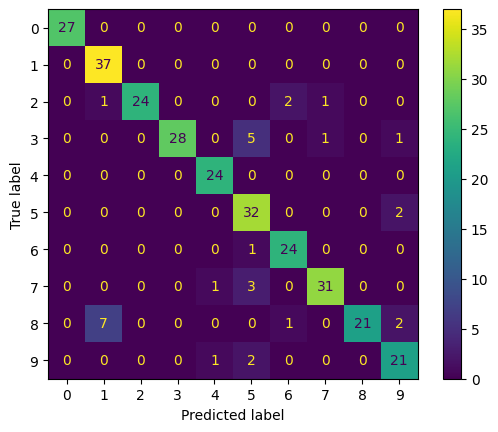

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(
    true_labels, predicted_labels, labels=lp_model.classes_
)

## plot most uncertain predictions

In [33]:
from scipy import stats

pred_entropies = stats.distributions.entropy(lp_model.label_distributions_.T)
print(pred_entropies[:5])

[4.60195940e-88 1.50499905e-62 2.02071084e-36 1.89116680e-83
 6.59515934e-46]


In [34]:
# 10 most uncertain labels
uncertainty_index = np.argsort(pred_entropies)[-10:]
uncertainty_index

array([213, 120, 238, 156,  73,  84,  55, 306,  89, 301])

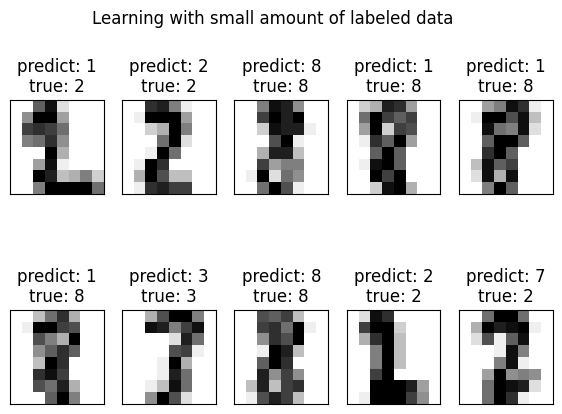

In [35]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(7, 5))
for index, image_index in enumerate(uncertainty_index):
    image = images[image_index]

    sub = f.add_subplot(2, 5, index + 1)
    sub.imshow(image, cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    sub.set_title(
        "predict: %i\ntrue: %i" % (lp_model.transduction_[image_index], y[image_index])
    )

f.suptitle("Learning with small amount of labeled data")
plt.show()